In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [18]:
orders = pd.read_csv('orders.csv')
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


In [19]:
orders['order_date'] = pd.to_datetime(orders['order_date'],infer_datetime_format=True)
orders['order_date'] = orders['order_date'].dt.strftime('%Y-%m')
orders1 = orders[(orders['order_date'] >= '2016-01') & (orders['order_date'] <= '2016-12')]

In [20]:
cohorts1 = orders1.groupby('customer_id', as_index=True).min()['order_date']
cohorts1 = pd.DataFrame(cohorts1)
cohorts1.reset_index(level=0, inplace=True)
cohorts1['order_date'] = pd.to_datetime(cohorts1['order_date'],infer_datetime_format=True)
cohorts1['Cohort'] = cohorts1['order_date'].dt.strftime('%Y-%m')
cohorts1 = cohorts1.drop(['order_date'], axis = 1)
cohorts1

,customer_id,Cohort
0,AA-10315,2016-03
1,AA-10375,2016-07
2,AA-10480,2016-07
3,AA-10645,2016-07
4,AB-10015,2016-11
...,...,...
633,WB-21850,2016-01
634,XP-21865,2016-08
635,YC-21895,2016-04
636,ZC-21910,2016-03


In [21]:
df_merged1 = pd.merge(orders1,cohorts1 , how='left', on='customer_id')

In [22]:
df_merged1['order_date'] = pd.to_datetime(df_merged1['order_date'],infer_datetime_format=True)
df_merged1['order_month'] = df_merged1['order_date'].dt.strftime('%Y-%m') 
df_merged1

,id,order_date,ship_mode,customer_id,sales,Cohort,order_month
0,100041,2016-11-01,Standard,BF-10975,328.540,2016-11,2016-11
1,100083,2016-11-01,Standard,CD-11980,24.784,2016-11,2016-11
2,100153,2016-12-01,Standard,KH-16630,63.880,2016-07,2016-12
3,100244,2016-09-01,Standard,GM-14695,475.694,2016-09,2016-09
4,100300,2016-06-01,Second,MJ-17740,4823.090,2016-04,2016-06
...,...,...,...,...,...,...,...
1310,168620,2016-12-01,Second,RB-19795,823.610,2016-04,2016-12
1311,169040,2016-12-01,Standard,GT-14710,1169.454,2016-02,2016-12
1312,169369,2016-12-01,Standard,EC-14050,299.070,2016-12,2016-12
1313,105830,2016-12-01,First,DB-13660,156.512,2016-12,2016-12


In [23]:
def cohort_period1(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [24]:
cohorts_group1 = df_merged1.groupby(['Cohort', 'order_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group1.rename(columns={'customer_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)
cohorts_group1 = cohorts_group1.groupby(level=0).apply(cohort_period1)
cohorts_group1.reset_index(inplace=True)
cohorts_group1.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_size1 = cohorts_group1['TotalUsers'].groupby(level=0).first()
user_retention1 = cohorts_group1['TotalUsers'].unstack(0).divide(cohort_group_size1, axis=1)

In [25]:
user_retention1.T

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11
Cohort,,,,,,,,,,,,
2016-01,1.0,0.021739,0.043478,0.086957,0.108696,0.108696,0.130435,0.086957,0.173913,0.130435,0.260870,0.26087
2016-02,1.0,0.073171,0.073171,0.048780,0.146341,0.097561,0.048780,0.170732,0.170732,0.121951,0.170732,NaN
2016-03,1.0,0.106667,0.146667,0.160000,0.146667,0.080000,0.253333,0.120000,0.186667,0.240000,NaN,NaN
2016-04,1.0,0.147059,0.102941,0.147059,0.132353,0.308824,0.117647,0.161765,0.235294,NaN,NaN,NaN
2016-05,1.0,0.088235,0.147059,0.073529,0.279412,0.147059,0.279412,0.161765,NaN,NaN,NaN,NaN
2016-06,1.0,0.074074,0.074074,0.277778,0.129630,0.240741,0.240741,NaN,NaN,NaN,NaN,NaN
2016-07,1.0,0.136364,0.295455,0.068182,0.181818,0.204545,NaN,NaN,NaN,NaN,NaN,NaN
2016-08,1.0,0.180000,0.080000,0.160000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09,1.0,0.046154,0.230769,0.138462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


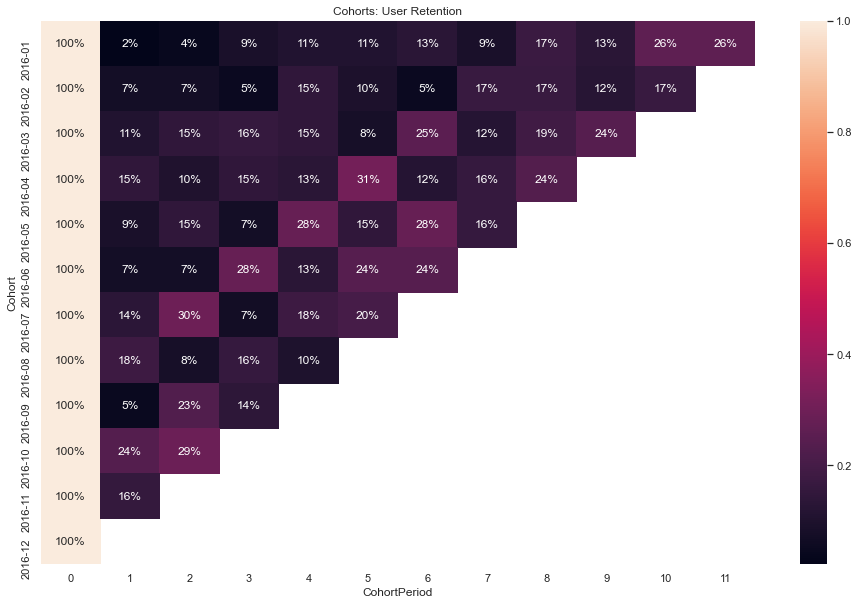

In [26]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention1.T, mask=user_retention1.T.isnull(), annot=True, fmt='.0%');